In [1]:
# === Import libraries ===
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [5]:
df = pd.read_csv("InternetSales.csv", encoding='latin1')

/tmp/ipython-input-2734210740.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("InternetSales.csv", encoding='latin1')


In [7]:
# Know the column names and dataset structure
print(df.columns.tolist())
df.head()

['ID', 'CustomerKey', 'GeographyKey', 'City', 'CountryRegionCode', 'EnglishCountryRegionName', 'CustomerAlternateKey', 'Title', 'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate', 'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'EnglishEducation', 'SpanishEducation', 'FrenchEducation', 'EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1', 'AddressLine2', 'Phone', 'DateFirstPurchase', 'CommuteDistance', 'ProductKey', 'EnglishProductName', 'OrderDateKey', 'DueDateKey', 'ShipDateKey', 'CustomerKey.1', 'PromotionKey', 'CurrencyKey', 'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber', 'RevisionNumber', 'OrderQuantity', 'UnitPrice', 'ExtendedAmount', 'UnitPriceDiscountPct', 'DiscountAmount', 'ProductStandardCost', 'TotalProductCost', 'SalesAmount', 'TaxAmt', 'Freight', 'CarrierTrackingNumber', 'CustomerPONumber', 'OrderDate', 'DueDate', 'ShipDat

,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1912.1544,1912.1544,3399.99,271.9992,84.9998,NaN,NaN,1/19/2011,1/31/2011,1/26/2011
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1265.6195,1265.6195,2319.99,185.5992,57.9998,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,8.2205,8.2205,21.98,1.7584,0.5495,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,1481.9379,1481.9379,2384.07,190.7256,59.6018,NaN,NaN,5/3/2013,5/15/2013,5/10/2013
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,10.8423,10.8423,28.99,2.3192,0.7248,NaN,NaN,5/3/2013,5/15/2013,5/10/2013


In [8]:
# === Select relevant columns ===
date_col = "OrderDate"
sales_col = "SalesAmount"
product_col = "EnglishProductName"

In [9]:
# Convert data types
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df[sales_col] = pd.to_numeric(df[sales_col], errors='coerce').fillna(0)

In [10]:
# Drop rows with no date
df = df.dropna(subset=[date_col])

In [11]:
# === 1. Which product generates the most sales ===
top_product = df.groupby(product_col)[sales_col].sum().sort_values(ascending=False).head(1)
print("\nTop Product by Total Sales:")
print(top_product)


Top Product by Total Sales:
EnglishProductName
Mountain-200 Black, 46    1.373470e+06
Name: SalesAmount, dtype: float64


In [12]:
# === 2. Prepare monthly total sales for forecasting ===
monthly = df.groupby(pd.Grouper(key=date_col, freq='M'))[sales_col].sum().reset_index()
monthly.columns = ['ds', 'y']

/tmp/ipython-input-145531909.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key=date_col, freq='M'))[sales_col].sum().reset_index()


In [13]:
# === 3. Forecast next 5 years (60 months) ===
m = Prophet(yearly_seasonality=True)
m.fit(monthly)

future = m.make_future_dataframe(periods=60, freq='M')
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpliu6dqx_/ainn1mr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpliu6dqx_/7drefgfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57632', 'data', 'file=/tmp/tmpliu6dqx_/ainn1mr2.json', 'init=/tmp/tmpliu6dqx_/7drefgfz.json', 'output', 'file=/tmp/tmpliu6dqx_/prophet_modelvapmqoz2/prophet_model-20251028050742.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:07:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:07:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

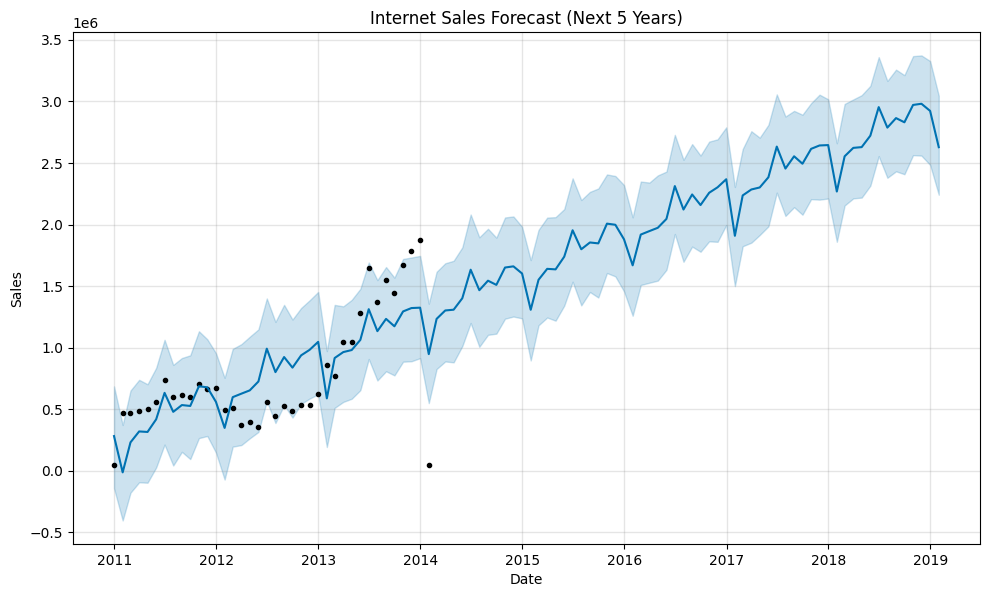

In [14]:
# === 4. Plot the forecast ===
fig = m.plot(forecast)
plt.title("Internet Sales Forecast (Next 5 Years)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()